# Data Scientists Salary Trends in Global Industries
Synopsis of the DataSet
The Dataset comprises 3761 rows and  9 columns, covering a wide range of variables

In [ ]:
#CONTENTS

#Introduction
#Objectives and Problem Statements
#Loading Data and Libraries
#Data Preprocessing and Exploratory Analysis (EDA)
#Trends Visualization, and Insights Extraction
#Final Results and Conclusion
#Author: An Overview

**About Data**:
This dataset aims to shed light on the salary trends in the field of Data Science for the years 2021 to 2023. With a focus on various aspects of employment, including work experience, job titles, and company locations, this dataset provides valuable insights into salary distributions within the industry.

Objectives

### To analyze and visualize Data Science salary trends from 2021-23 globally.
### To summarize salary variations based on company size over the years.
###To present average salaries categorized by experience levels and job titles.
###To evaluate salary differences across employment types in Data Science.
###To identify and rank the top 15 Data Science job titles by average salary.
###To depict the distribution of experience levels for the top 20 salaries.
###To track the transition of top 20 job titles across experience levels.
###To assess average salaries based on currency, location, and company size.

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading Dataset

df = pd.read_csv("/content/Data Science Salary 2021 to 2023.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [ ]:
 #Defining the styling map
def hamsafar_styles(row):
    # Defining alternate colors pattern
    my_row_colors = ['#ededed', 'yellow']
    my_text_colors = ['#e81123', '#0d4987']

    # Targetting the index of the current row
    index = df[df.apply(lambda hamsafar: (hamsafar == row).all(), axis=1)].index[0]

    # Determining the background color and text color based on the index
    my_background_color = my_row_colors[index % len(my_row_colors)]
    my_text_color = my_text_colors[index % len(my_text_colors)]

    # Applying styles to the row cells
    styles = [f'background-color: {my_background_color}; color: {my_text_color}; border: 1px solid black;'] * len(row)
    return styles

# Applying the styles to the DataFrame
first_styled_df = df.head(8).style.apply(hamsafar_styles, axis=1).set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#42ba00"), ("border", '1px solid black')]}
])

In [ ]:
first_styled_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
5,2023,EN,FT,Applied Scientist,110680,USD,110680,US,L
6,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,M
7,2023,EN,FT,Machine Learning Engineer,145885,USD,145885,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


Statistical Summary


In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [ ]:
# Defining a function to re-map abbreviations in experience_level column to proper full terms.
def remap_experience_level(level):
    level_remapping = {
        'EN': 'Novice',
        'MI': 'Intermediate',
        'EX': 'Expert',
        'SE': 'Principal'
    }
    return level_remapping.get(level, level)

# Applying mapping function to the 'experience_level' column.
df['experience_level'] = df['experience_level'].map(remap_experience_level)

In [ ]:
# Defining a function to re-map abbreviations in employment_type column to proper full terms.
def remap_employment_type(employment_type):
    type_remapping = {
        'FL': 'Freelancer',
        'PT': 'Part-Time',
        'CT': 'Contractor',
        'FT': 'Full-Time'
    }
    return type_remapping.get(employment_type, employment_type)

# Applying mapping function to the 'employment_type' column.
df['employment_type'] = df['employment_type'].map(remap_employment_type)

In [ ]:
# Defining a function to re-map abbreviations in Company_size column to proper full terms.
def remap_company_size(size):
    size_remapping = {
        'M': 'Medium',
        'S': 'Small',
        'L': 'Large'
    }
    return size_remapping.get(size, size)

# Applying mapping function to the 'company_size' column.
df['company_size'] = df['company_size'].map(remap_company_size)

In [ ]:
# Defining the styling map
def hamsafar_styles(row):
    # Defining alternate colors pattern
    my_row_colors = ['#ededed', 'white']
    my_text_colors = ['#e81123', '#0d4987']

    # Targetting the index of the current row
    index = df[df.apply(lambda hamsafar: (hamsafar == row).all(), axis=1)].index[0]

    # Determining the background color and text color based on the index
    my_background_color = my_row_colors[index % len(my_row_colors)]
    my_text_color = my_text_colors[index % len(my_text_colors)]

    # Applying styles to the row cells
    styles = [f'background-color: {my_background_color}; color: {my_text_color}; border: 1px solid black;'] * len(row)
    return styles

# Applying the styles to the DataFrame
second_styled_df = df.head(8).style.apply(hamsafar_styles, axis=1).set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#42ba00"), ("border", '1px solid black')]}
])

In [ ]:
# Displaying updated dataset
second_styled_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,Novice,Full-Time,Applied Scientist,213660,USD,213660,US,Large
1,2023,Novice,Full-Time,Applied Scientist,130760,USD,130760,US,Large
2,2023,Novice,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Large
3,2023,Novice,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Large
4,2023,Novice,Full-Time,Applied Scientist,204620,USD,204620,US,Large
5,2023,Novice,Full-Time,Applied Scientist,110680,USD,110680,US,Large
6,2023,Novice,Full-Time,Machine Learning Engineer,163196,USD,163196,US,Medium
7,2023,Novice,Full-Time,Machine Learning Engineer,145885,USD,145885,US,Medium


#Data Scientist Salaries Trends Overtime (2020-23) 📉
How to do?
To analyze Data Scientist Salaries Trends (2020-23), we will need to:

Filter the salaries data, sorting it year-wise for a chronological representation.
Create a seaborn line plot with 'work_year' on the x-axis and 'salary_in_usd' on the y-axis.
Set title, x-label, and y-label with coresponding context.
Display the resulting plot.

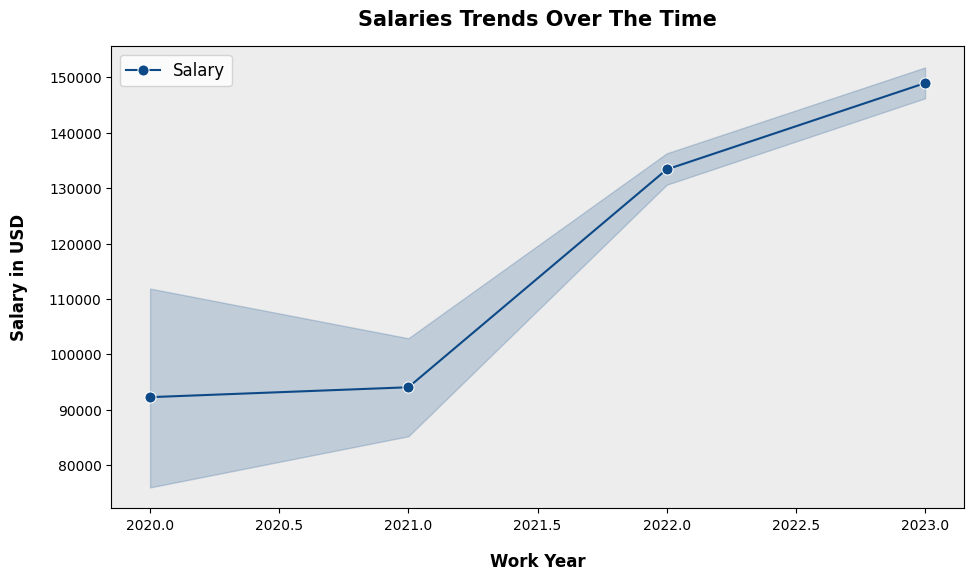

In [ ]:
# Defining figure size.
plt.figure(figsize = (11,6))

# Filtering salaries data, sorted year-wisely.
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by='work_year')

# creating seaborn line plot.
ax = sns.lineplot(data=salary_trend, x='work_year', y='salary_in_usd', marker='o', linestyle='solid', color='#0d4987', markersize=8)

# Adding title, x-label and y-label to the plot.
plt.title('Salaries Trends Over The Time', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Work Year', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold', labelpad=15)

# Adding custome background color.
ax.set_facecolor("#ededed")

# Adding legend.
plt.legend(['Salary'], loc='best', fontsize=12)

# Displaying plot.
plt.show()

In [ ]:
!pip install bar_chart_race


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.4 MB/s eta 0:00:00


In [ ]:

import plotly.express as px

# Load data
df = pd.read_csv("/content/Data Science Salary 2021 to 2023.csv")

# Filtering salaries data, sorted year-wisely.
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by='work_year')

# Creating Plotly line plot
fig = px.line(
    salary_trend,
    x='work_year',
    y='salary_in_usd',
    markers=True,
    labels={
        'salary_in_usd': 'Salary in USD',
        'work_year': 'Work Year'
    }
)

# Adding title to the plot
fig.update_layout(
    title={
        'text': 'Salaries Trends Over The Time',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#ededed',
    xaxis_title='Work Year',
    yaxis_title='Salary in USD',
    legend_title='Legend'
)

# Adding customizations
fig.update_traces(line=dict(color='#0d4987', width=2), marker=dict(size=8))

# Displaying plot
fig.show()

In [ ]:
# Creating Plotly animated race bar chart
fig_bar = px.bar(
    salary_trend,
    x='salary_in_usd',
    y='work_year',
    animation_frame='work_year',
    orientation='h',
    labels={
        'salary_in_usd': 'Salary in USD',
        'work_year': 'Work Year'
    },
    title='Animated Race Bar Chart - Salary Trends'
)

# Creating Plotly animated bubble chart
fig_bubble = px.scatter(
    salary_trend,
    x='work_year',
    y='salary_in_usd',
    size='salary_in_usd',
    color='salary_in_usd',
    animation_frame='work_year',
    labels={
        'salary_in_usd': 'Salary in USD',
        'work_year': 'Work Year'
    },
    title='Animated Bubble Chart - Salary Trends'
)

# Displaying the animated charts
fig_bar.show()
fig_bubble.show()

In [ ]:
# Creating Plotly animated line chart
fig_line = px.line(
    salary_trend,
    x='work_year',
    y='salary_in_usd',
    animation_frame='work_year',
    markers=True,
    labels={
        'salary_in_usd': 'Salary in USD',
        'work_year': 'Work Year'
    },
    title='Animated Line Chart - Salary Trends'

)

# Displaying the animated line chart
fig_line.show()


Insights
The above plot show that:

The depicted plots reveal a relatively stable salary trend from 2020 to 2021.
Subsequently, notable fluctuations in salary occurred during the 2021 to 2022 period.
Similarly, the progression in salary from 2022 to 2023 exhibited a comparable pattern.

#Salaries Trends Over Time by Company Size 🏢

How to do?
To analyze Salaries Trends Over Time by Company Size,

we will need to:

Create a Seaborn line plot with 'work_year' on the x-axis, 'salary_in_usd' on the y-axis, and differentiate lines based on 'company_size'.
Set title, x-label, and y-label with coresponding context.
Display the resulting plot.

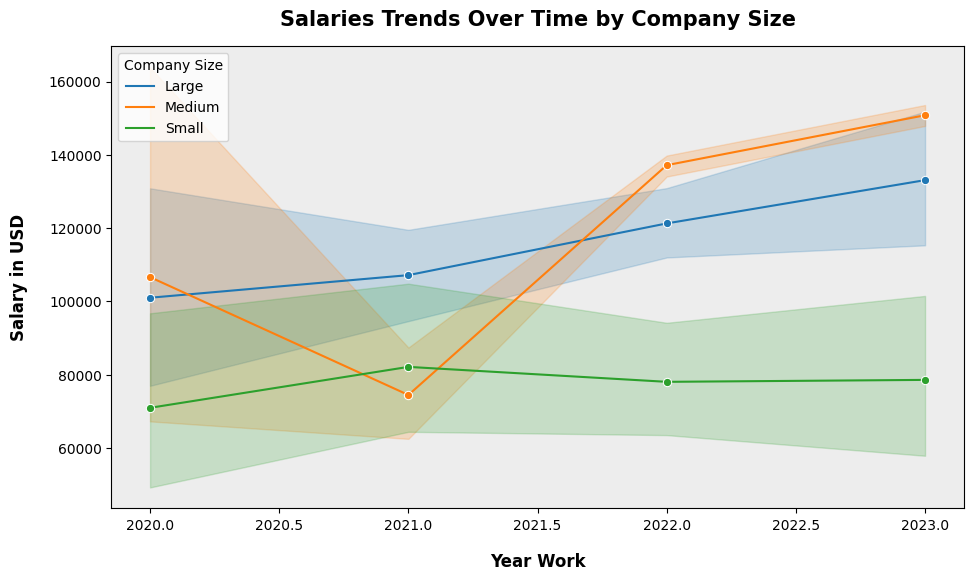

In [ ]:
plt.figure(figsize=(11, 6))

p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.title('Salaries Trends Over Time by Company Size', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Year Work', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold', labelpad=15)

p.set_facecolor("#ededed")

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

plt.show()

#Insights
The above plot show that:

Salaries in large-sized companies consistently increased from 2020 to 2023.
In medium-sized companies, there was an initial decrease from 2020 to 2021, followed by a notable increase from 2021 to 2022, aligning with the upward trajectory seen in large-sized companies. From 2022 to 2023, the pattern continued, resembling the increasing rate observed in large-sized companies.
Small-sized companies experienced a slight increase in salaries between 2020 and 2021, surpassing medium and large-sized counterparts. However, from 2021 to 2022, there was a minor decrease. Beyond 2022 to 2023, salaries in small-sized companies maintained a steady, neither increasing nor decreasing, pattern.

#Salaries Trends Over Time by Experience Levels 👨‍🎓
How to do?
To analyze Salaries Trends Over Time by Experience Level, we will need to:

Calculate the average salary for each combination of 'experience_level' and 'work_year' by grouping them together and taking mean of the 'salary_in_usd' column.
Extract unique experience levels from the 'experience_level' column.
Create a Seaborn line plot depicting 'work_year' on the x-axis, 'salary_in_usd' on the y-axis, and distinguishing lines by 'experience_level'.
Set title, x-label, and y-label with coresponding context.
Display the resulting plot.

In [ ]:
# Calculating average salary for each experience level and work year.
average_salaries = df.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean()

# Printing the average salaries for each experience level and work year manually.
for experience_level, work_year in average_salaries.index:
    average_salary = average_salaries.loc[experience_level, work_year]
    print(f"{experience_level}: {work_year}, ${average_salary:.0f}")

Expert: 2020, $139944
Expert: 2021, $186128
Expert: 2022, $188260
Expert: 2023, $203706
Intermediate: 2020, $87565
Intermediate: 2021, $82117
Intermediate: 2022, $101306
Intermediate: 2023, $116200
Novice: 2020, $57512
Novice: 2021, $54905
Novice: 2022, $77006
Novice: 2023, $95284
Principal: 2020, $137240
Principal: 2021, $126085
Principal: 2022, $147694
Principal: 2023, $159569


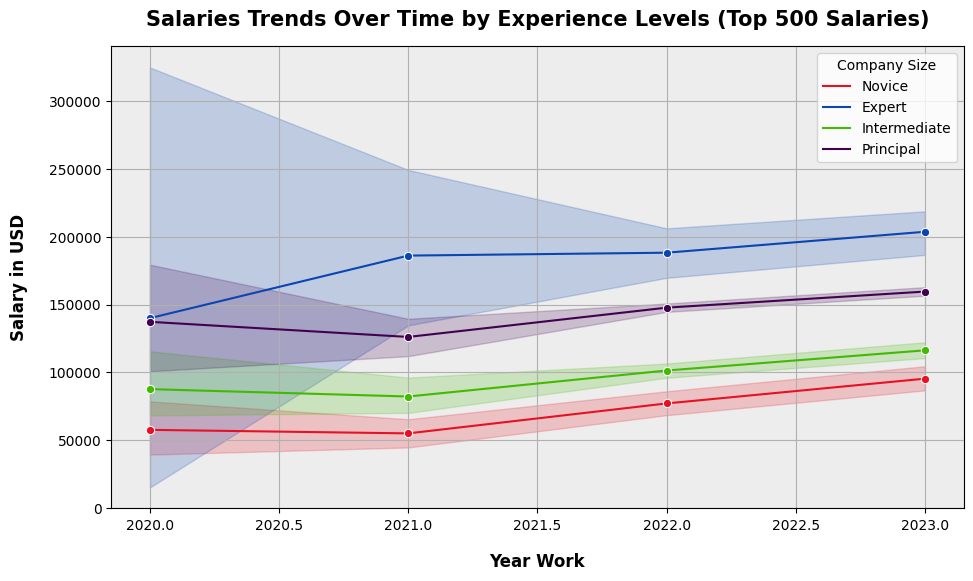

In [ ]:
# Extracting unique experience levels.
experience_levels = df['experience_level'].unique()

# Specifying custom colors for each experience level.
custom_colors = ['#e81123', '#0b45b2', '#42ba00', '#420050']

# Creating a dictionary for mapping each experience level to its corresponding custom color.
experience_level_colors = dict(zip(experience_levels, custom_colors))

plt.figure(figsize=(11, 6))

p = sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df, marker='o', palette=experience_level_colors)

plt.title('Salaries Trends Over Time by Experience Levels (Top 500 Salaries)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Year Work', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold', labelpad=15)

p.set_facecolor("#ededed")

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')

p.grid(True)

plt.show()

In [ ]:
#Insights
#The above line plot reveals that:

#Novice-level professionals witnessed an increase from $57,512 in 2020 to $54,905 in 2021, followed by a significant decrease to $77,006 in 2022. A slight increase was observed in 2023.
#Intermediate-level professionals experienced a substantial decrease in average salaries, dropping from $87,565 in 2020 to $82,117 in 2022, with a minor decline to $1,01,306 in 2023.
#Salaries for individuals at the Expert level gradually decreased from $1,39,944 in 2020 to $1,86,128 in 2022, followed by a slight increase to $1,88,260 in 2023.
#For individuals at the Principal level, salaries exhibited a decrease from $1,37,240 in 2020 to $1,26,085 in 2021, followed by an increase to $1,47,694 in 2022. A slight uptick was noted in 2023.

#Average Salaries by Experience Levels
How to do?
To analyze Average Salaries by Experience Levels, we will need to:

Filter the salary data, sorting it year-wise for a chronological representation.
Create a Seaborn line plot with 'work_year' on the x-axis and 'salary_in_usd' on the y-axis.
Set title, x-label, and y-label with corresponding context.
Display the resulting plot.

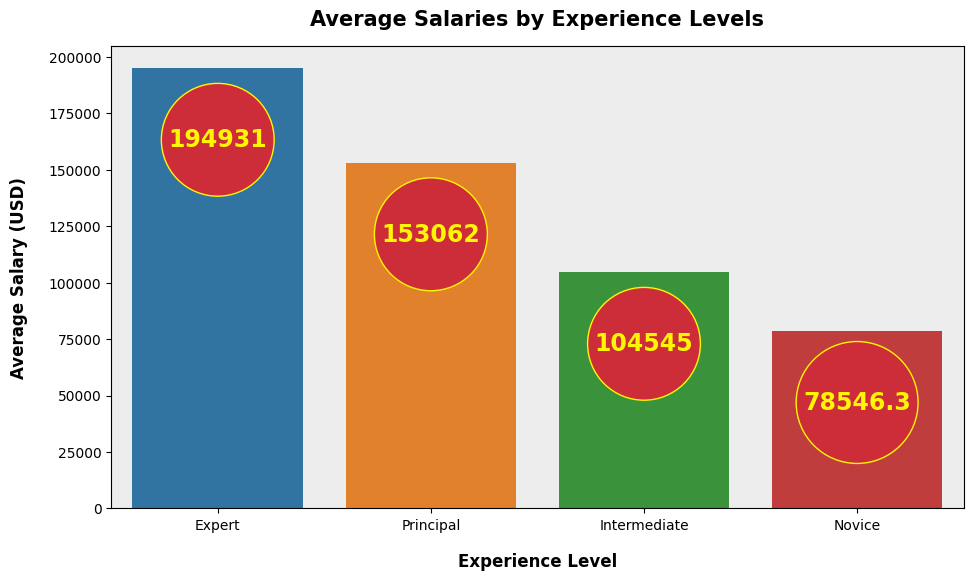

In [ ]:
# Calculating the average salary for each experience level and sort the results in descending order.
exp_level_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

# Defining figure size.
plt.figure(figsize = (11,6))

# Adding a color palette from seaborn for bars.
sns.color_palette("husl", 8)

# creating seaborn bar plot.
ax = sns.barplot(x = exp_level_salary.index, y = exp_level_salary.values)

# Adding title, x-label and y-label to the plot.
plt.title('Average Salaries by Experience Levels', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Experience Level', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

# Iterating through each container (bar) in the axis (ax) and add labels to the bars.
for container in ax.containers:
    # Targetting bars labels.
    ax.bar_label(
        # Defining targetted area.
        container,

        # Adjusting labels padding.
        padding=-60,

        # Setting font size for the labels.
        fontsize=17,

        # Adding custome labels box style.
        bbox={'boxstyle': 'circle', 'facecolor': '#cd2c39', 'edgecolor': '#fff600'},

        # Setting the font weight as bold for the labels.
        fontweight='bold',

        # Setting custome font color for the labels.
        color='#fff600',

        # Specifying the label type as "edge".
        label_type="edge"
)

# Adding custome background color.
ax.set_facecolor("#ededed")

# Removing grid lines.
ax.grid(False)

# Displaying plot.
plt.show()

In [ ]:
import plotly.express as px

# Calculating the average salary for each experience level and sort the results in descending order.
exp_level_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

# Creating Plotly animated race bar chart
fig_race_bar = px.bar(
    exp_level_salary,
    x=exp_level_salary.index,
    y=exp_level_salary.values,
    animation_frame=exp_level_salary.index,
    labels={
        'x': 'Experience Level',
        'y': 'Average Salary in USD'
    },
    title='Animated Race Bar Chart - Average Salary by Experience Level'
)

# Displaying the animated race bar chart
fig_race_bar.show()


 #Average Salaries by Employment Types

How to do?
To analyze Average Salaries by Employment Types, we will need to:

Filter data grouped by 'employment_type' and calculate average salaries for each type.
Create a Seaborn bar plot with 'employment_type' on the x-axis and average salaries on the y-axis.
Set title, x-label, and y-label with coresponding context.
Display the resulting plot.

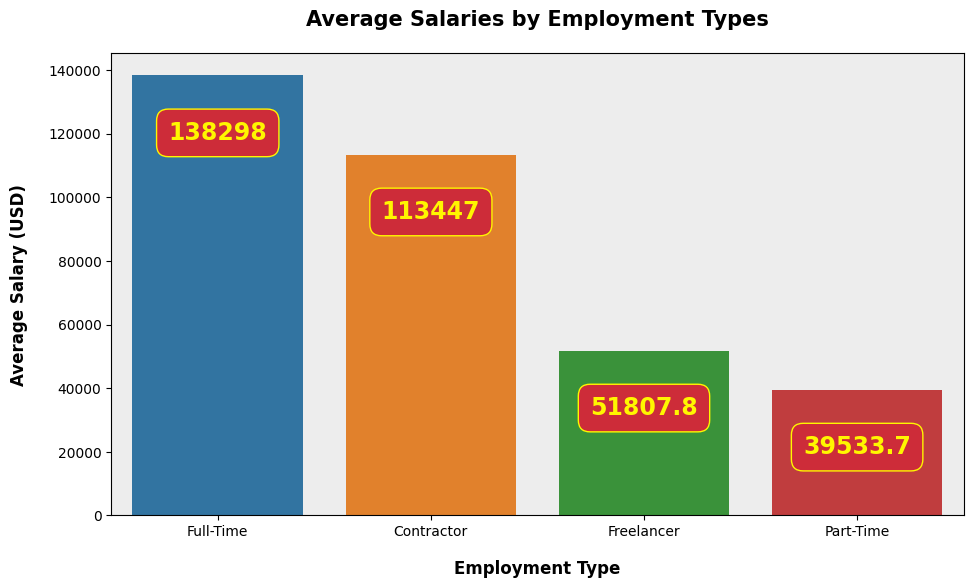

In [ ]:
# Filtering data (as grouped by 'employment_type') and calculating average salaries for each type.
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize = (11,6))

p = sns.barplot(y = emp_salary.values, x = emp_salary.index)

sns.color_palette("hls", 8)

plt.title('Average Salaries by Employment Types', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Employment Type', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'round, pad=0.5', 'facecolor': '#cd2c39', 'edgecolor': '#fff600'},
                fontweight = 'bold', color = '#fff600',
                label_type="edge"
    )

p.set_facecolor("#ededed")

p.grid(False)

plt.show()

Average Salaries by Job Titles (Top 15)

How to do?
To analyze Average Salaries by Job Titles (Top 15), we will need to:

Group data by 'job_title' and calculate the average salary for each title.
Create a Seaborn bar plot with average salaries on the x-axis and 'job_title' on the y-axis (considering only the top 15 job titles).
Set title, x-label, and y-label with corresponding context.
Display the resulting bar plot.

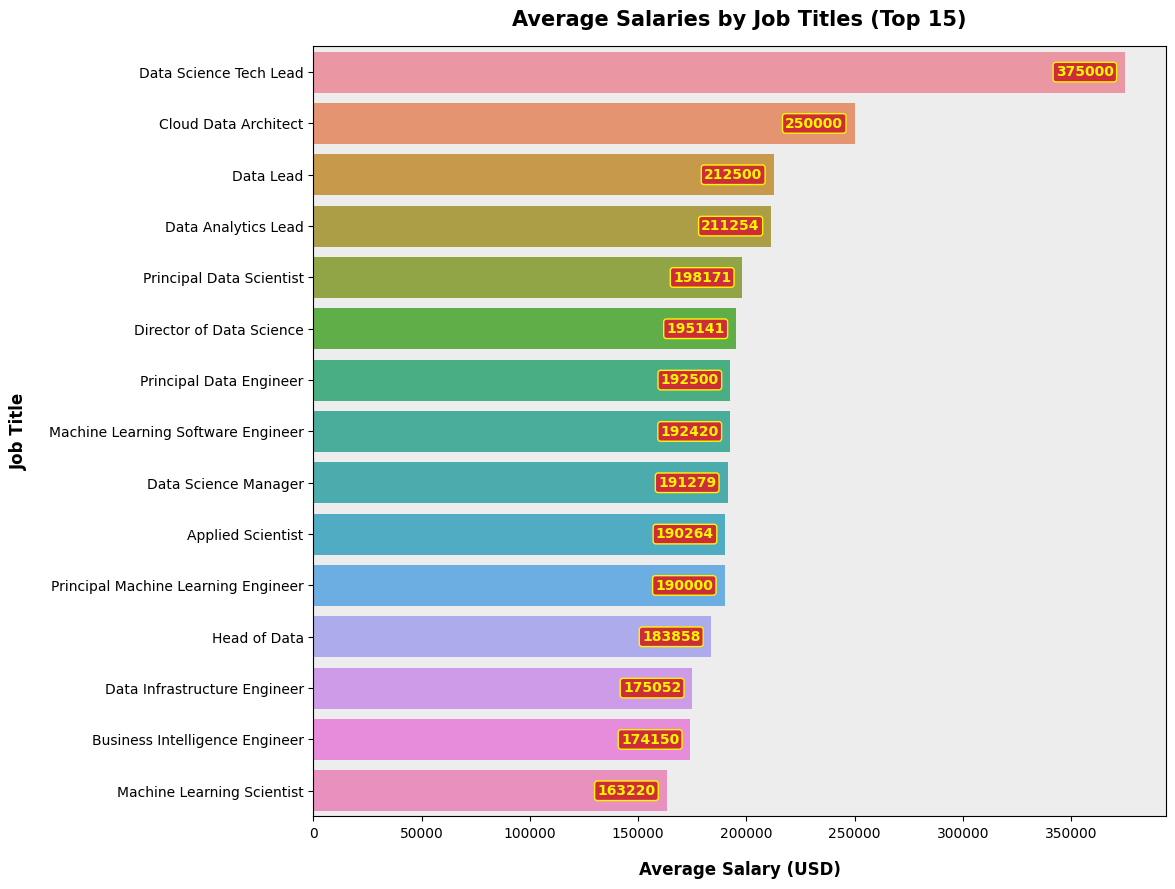

In [ ]:
# Grouping data by 'job_title' and calculating average salary for each title.
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (11, 10))

p = sns.barplot(x=job_title_salary.values[:15], y=job_title_salary.index[:15])

plt.title('Average Salaries by Job Titles (Top 15)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Job Title', fontsize=12, fontweight='bold', labelpad=15)

for container in p.containers:
    p.bar_label(container,
                padding = -50,
                bbox = {'boxstyle': 'round, pad=0.2', 'facecolor': '#cd2c39', 'edgecolor': '#fff600'},
                fontweight = 'bold',
                color = '#fff600'
               )

p.set_facecolor("#ededed")

p.grid(False)

plt.show()

In [ ]:
import plotly.express as px

# Grouping data by 'job_title' and calculating average salary for each title.
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Creating Plotly animated bar chart
fig_animated_bar = px.bar(
    job_title_salary,
    x=job_title_salary.values,
    y=job_title_salary.index,
    labels={
        'x': 'Average Salary (USD)',
        'y': 'Job Title'
    },
    title='Animated Bar Chart - Average Salaries by Job Titles',
    orientation='h',
    animation_frame=job_title_salary.index,

)

# Displaying the animated bar chart
fig_animated_bar.show()


In [ ]:
#Data Science Tech Lead commands the highest average salary, reaching $3,75,000.
#Data Lead and Cloud Data Architect also enjoy notably high salaries.
#Also, there is a slight difference in salaries between Data Lead and Data Analytics Lead.
#The top 15 job titles collectively showcase a robust earning potential, ranging from $ $163,220 to $375,000, highlighting the lucrative nature of roles within the field.

#Average Salaries by Currency

How to do?
To analyze Average Salaries by Currency, we will need to:

Group the data by 'salary_currency' and calculate the average salary in USD for each currency.
Create a Seaborn bar plot with 'salary_currency' on the y-axis and average salaries in USD on the x-axis.
Set title, x-label, and y-label with corresponding context.
Display the resulting plot.

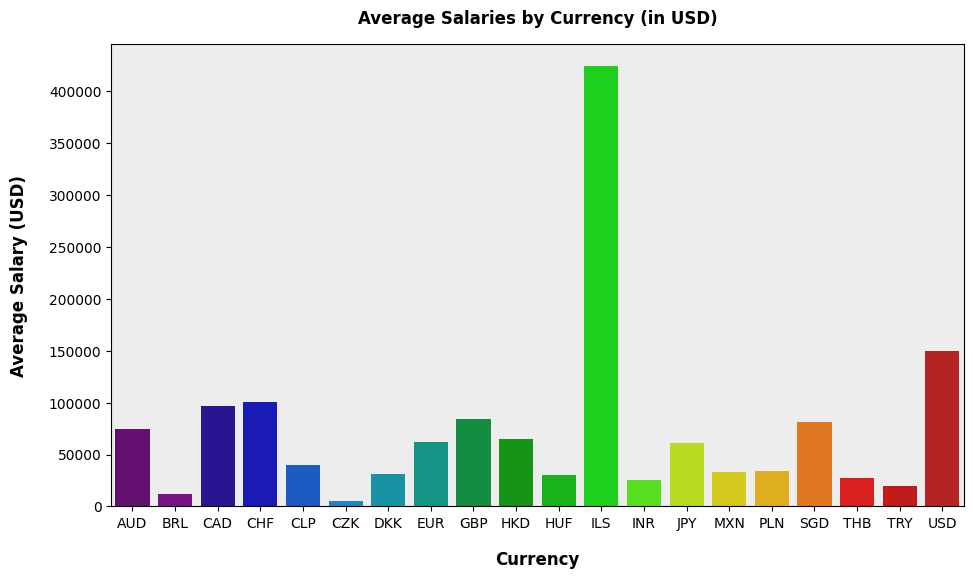

In [ ]:
# Grouping data by 'salary_currency' and calculating average salary in USD for each currency.
currency_salary = df.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize=(11, 6))

p = sns.barplot(x=currency_salary.index, y=currency_salary.values, palette='nipy_spectral')

plt.title('Average Salaries by Currency (in USD)', fontsize=12, fontweight='bold', pad=15)
plt.xlabel('Currency', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

p.set_facecolor("#ededed")

plt.show()

In [ ]:
#Salaries in ILS (Israeli Shekel) are notably high, averaging around $4,23,834.
#Employees receiving salaries in USD have the highest average, approximately $1,49,351.
#CHF (Swiss Franc) and CAD (Canadian Dollar) also offer competitive average salaries of $100,682 and $96,707, respectively.
#Other currencies show varying average salaries, with BRL (Brazilian Real) and CZK (Czech Koruna) being the lowest at $12,448 and $5,132, respectively.

#Average Data Scientist Salaries by Location (Top 15) 🌎
How to do?
To analyze Average Data Scientist Salaries by Location (Top 15), we will need to:

Group the data by 'company_location' and calculate the mean salary for each location.
Sort the locations by average salary in descending order (High to Low).
Select the top 15 locations for plotting.
Create a Seaborn bar plot with 'salary_in_usd' on the x-axis and 'company_location' on the y-axis.
Set title, x-label, and y-label with corresponding context.
Display the resulting plot.

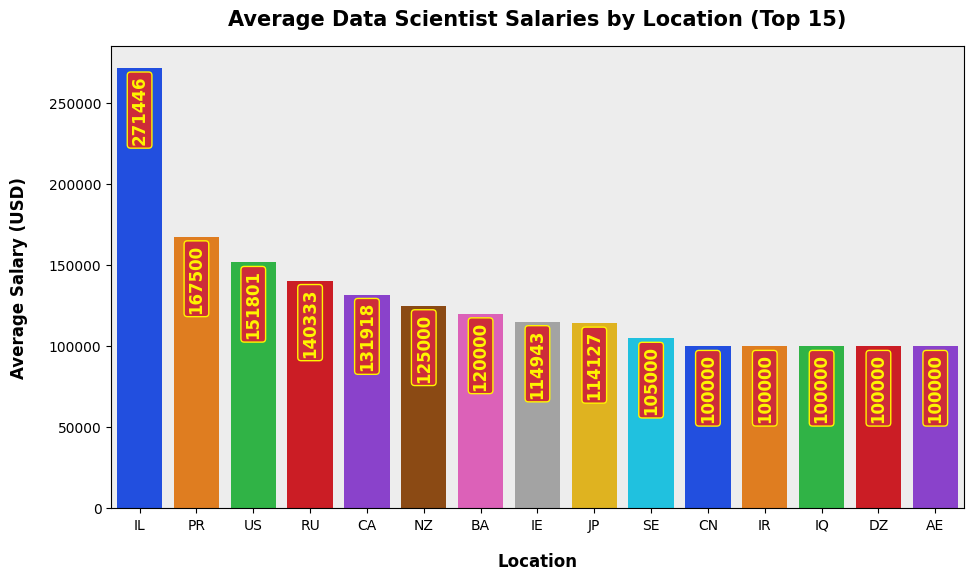

In [ ]:
# Grouping data by company_location and calculating salary mean for each location.
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sorting locations by average salary in descending order.
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Selecting the top 15 locations for plotting.
top_n_locations = 15

plt.figure(figsize=(11, 6))

p = sns.barplot(x='company_location', y='salary_in_usd', data=average_salaries_by_location.head(top_n_locations), palette='bright')

plt.title('Average Data Scientist Salaries by Location (Top 15)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Location', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

for container in p.containers:
    p.bar_label(container,
                padding=-55,
                fontsize=12,
                bbox={'boxstyle': 'round, pad=0.2', 'facecolor': '#cd2c39', 'edgecolor': '#fff600'},
                fontweight='bold', color='#fff600',
                label_type="edge",
                rotation=90
               )

p.set_facecolor("#ededed")

plt.show()

In [ ]:
#Illinois (IL) leads with the highest average data science salary at $2,71,446 USD.
#Puerto Rico (PR) offers competitive average salaries, indicating a robust job market.
#The United States (US) maintains a strong presence in data science, with a competitive average salary of $1,51,801.
#Russia (RU) demonstrates a solid data science job market with an average salary of approximately $1,40,333.
#Canada (CA) is an attractive location for data science professionals, offering a competitive average salary of $1,31,917.

Average Salaries by Company Size

How to do?
To analyze Average Salaries by Company Size, we will need to:

Group data by 'company_size' and calculate the average salary for each size.
Create a Seaborn bar plot with 'company_size' on the x-axis and average salaries on the y-axis.
Set title, x-label, and y-label with corresponding context.
Display the resulting plot.

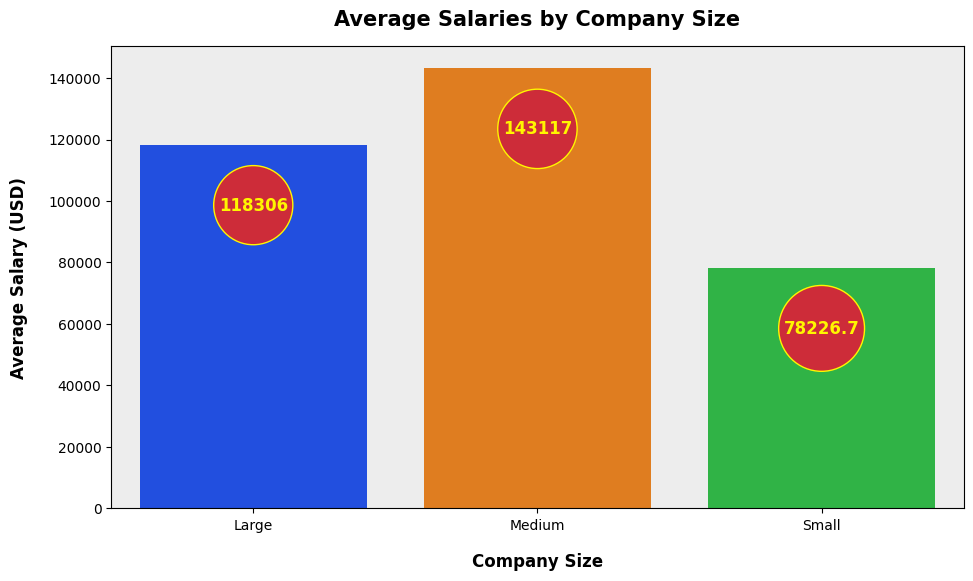

In [ ]:
# Grouping data by 'company_size' and calculating average salary for each size.
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()

plt.figure(figsize=(11, 6))

p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'bright')

plt.title('Average Salaries by Company Size', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Company Size',fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

for container in p.containers:
    p.bar_label(container,
                padding = -50,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': '#cd2c39', 'edgecolor': '#fff600'},
                fontweight = 'bold', color = '#fff600'
               )

p.set_facecolor("#ededed")

plt.show()


Salaries Distribution for Data Science Professionals

How to do?
To analyze Salaries Distribution for Data Science Professionals, we will need to:

Simply create a histogram (seaborn's histplot) for the 'salary_in_usd' column with kernel density estimation (kde) True and number of bins (20).Set title, x-label, and y-label with corresponding context.
Set title, x-label, and y-label with corresponding context.
Display the resulting histogtam.

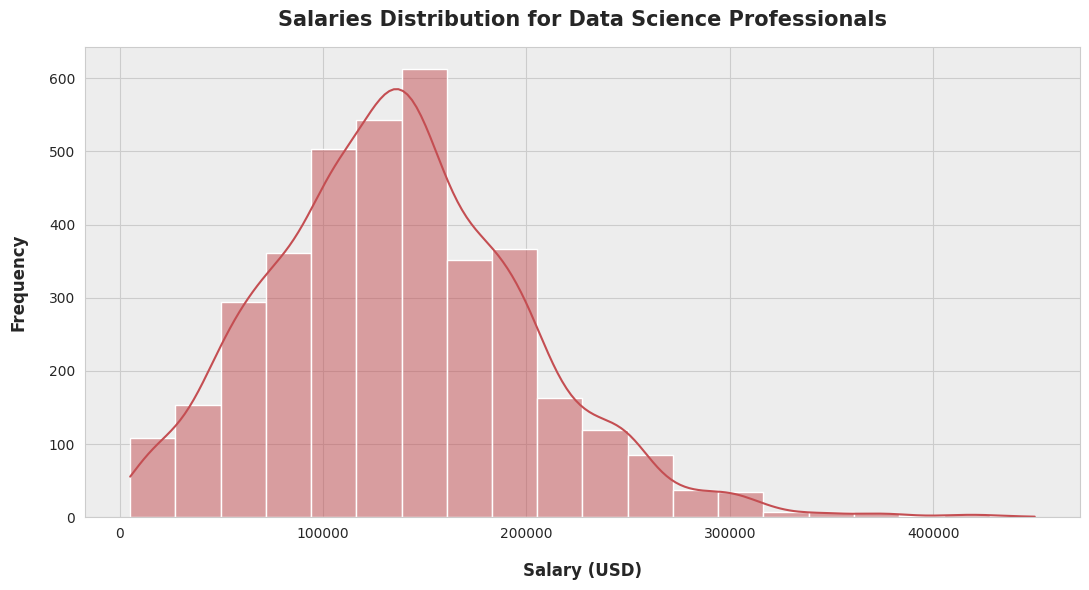

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(11, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

ax.set_title('Salaries Distribution for Data Science Professionals', fontsize=15, fontweight='bold', pad=15)
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold', labelpad=15)

ax.tick_params(axis='y', which='both', left=False)

ax.set_facecolor("#ededed")

plt.tight_layout()

plt.show()

Insights

The salary distribution for data science professionals reveals a right-skewed pattern, indicating a prevalence of lower to mid-range salaries.

A distinctive peak in the distribution suggests a concentrated presence of professionals within a specific salary range.

The KDE (Kernel Density Estimate) curve, providing a smooth estimate, highlights a prominent peak in the distribution.

 #Distribution of Experience Levels for Each Job Title (Top 100)#

How to do?
To analyze Distribution of Experience Levels for Each Job Title in the top 100 salaries, we will need to:

Sort the data based on 'salary_in_usd' in descending order, and select the top 100 salaries.
Extract the 'job_title' and 'experience_level' columns from the sorted DataFrame.
Group the data by 'job_title' and 'experience_level'.
Calculate the percentage distribution of experience levels for each job title.
Create a Seaborn horizontal stacked bar chart with percentage on the x-axis, and job titles on the y-axis.
Set title, x-label, and y-label with coresponding context.
Display the resulting plot.

<Figure size 1400x800 with 0 Axes>

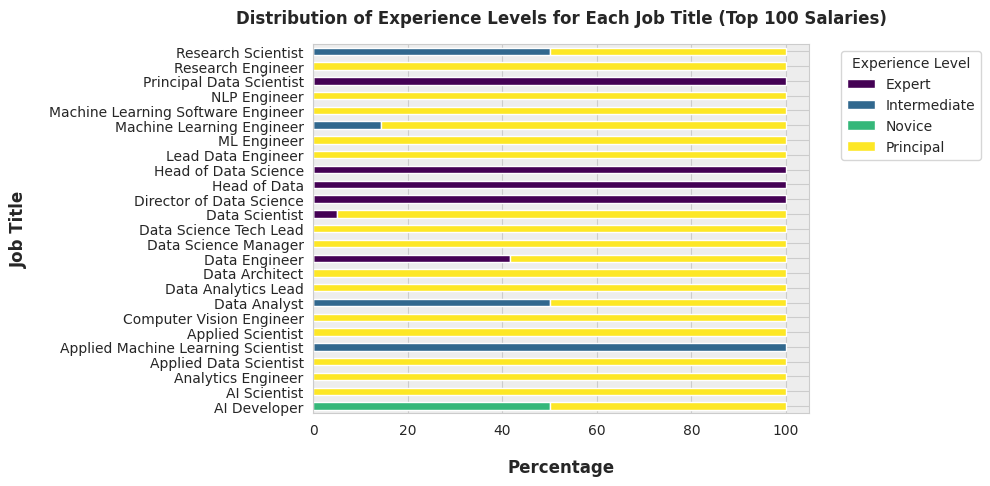

In [ ]:
# Sorting the DataFrame in descending order based on 'salary_in_usd' and selecting top 100 entries.
top_100_salaries_df = df.sort_values(by='salary_in_usd', ascending=False).head(100)

# Extracting 'job_title' and 'experience_level' columns from the top 100 salaries sorted DataFrame.
job_experience_df = top_100_salaries_df[['job_title', 'experience_level']]

# Grouping data based on 'job_title' and 'experience_level' columns.
grouped_data = job_experience_df.groupby(['job_title', 'experience_level'])

# Filling missing values in previously grouped data with zeros, if exist.
filled_data = grouped_data.size().unstack(fill_value=0)

# Calculating percentage distribution of experience levels for each job title.
distribution_df = filled_data.apply(lambda x: x / x.sum(), axis=1) * 100

plt.figure(figsize=(14, 8))

ax = distribution_df.plot(kind='barh', stacked=True, colormap='viridis')

plt.title('Distribution of Experience Levels for Each Job Title (Top 100 Salaries)', fontsize=12, fontweight='bold', pad=15)
plt.xlabel('Percentage', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Job Title', fontsize=12, fontweight='bold', labelpad=15)

plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_facecolor("#ededed")

plt.show()

Insights

The presented plot reveals that:

Principal level professionals dominate the distribution, holding the majority of top-tier positions.

Expert level individuals follow closely, occupying a significant and noteworthy share.

Other experience levels exhibit a relatively smaller and less notable distribution in comparison.

#Job Titles Recommendation (Top 5 Jobs)

How to do?
To provide Job Titles Recommendation based on candidate criteria, we will need to:

Define candidate criteria, including the desired experience level ('Novice') and the desired salary range in USD.
Filter the data based on the specified experience level and desired salary range.
Count the occurrences of each job title in the filtered data.
Create a Seaborn bar plot with 'Count' on the x-axis, 'Job Title' on the y-axis, and different colors for each bar.
Set title, x-label, and y-label with corresponding context.
Display the resulting plot.

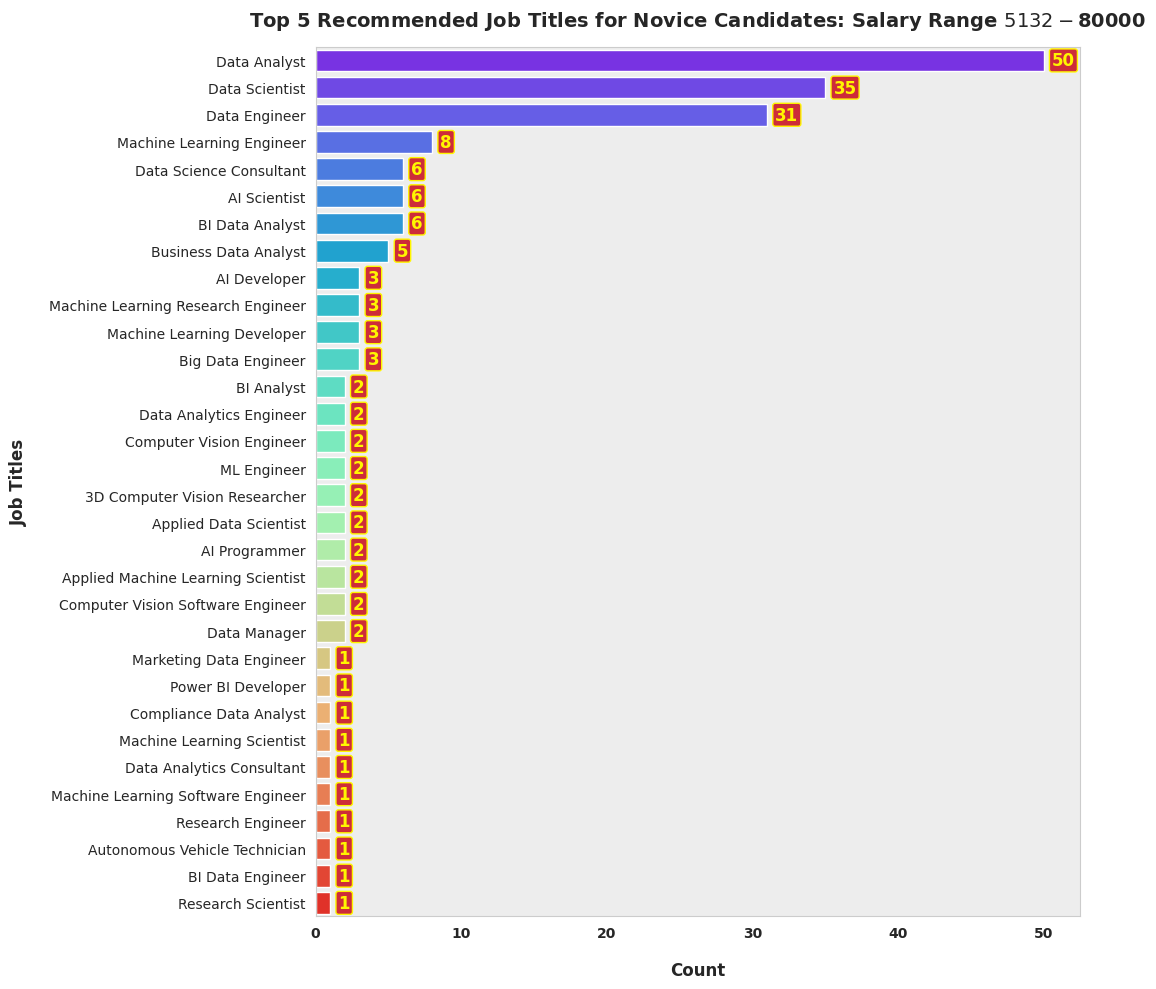

In [ ]:
# Defining candidate criteria.
desired_experience_level = 'Novice'

# Defining desired salary range in USD.
desired_salary_range = (5132, 80000)

# Filtering data based on experience leveles and desired salary range.
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Counting occurrences of each job title.
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

plt.figure(figsize=(11, 10))

ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')

plt.title(f'Top 5 Recommended Job Titles for {desired_experience_level} Candidates: Salary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Count', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Job Titles', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                 label_type="edge",
                 padding=6,
                 fontsize=12,
                 bbox = {'boxstyle': 'round, pad=0.15', 'facecolor': '#cd2c39', 'edgecolor': '#fff600'},
                 fontweight = 'bold',
                 color = '#fff600'
                )

ax.set_facecolor("#ededed")

ax.grid(False)

plt.tight_layout()

plt.show()


For Entry-Level candidates aspiring to a salary range between 5,132 and 80,000 USD

 the top 5 recommended job titles are:

Data Analyst — 50 job openings.
Data Scientist — 35 job openings.
Data Engineer — 31 job openings.
Machine Learning Engineer 8 — job openings.
Data Science Consultant — 6 job openings.

Other job titles at different levels exhibit relatively fewer openings, emphasizing the concentration of opportunities within these top roles for candidates at the entry level.

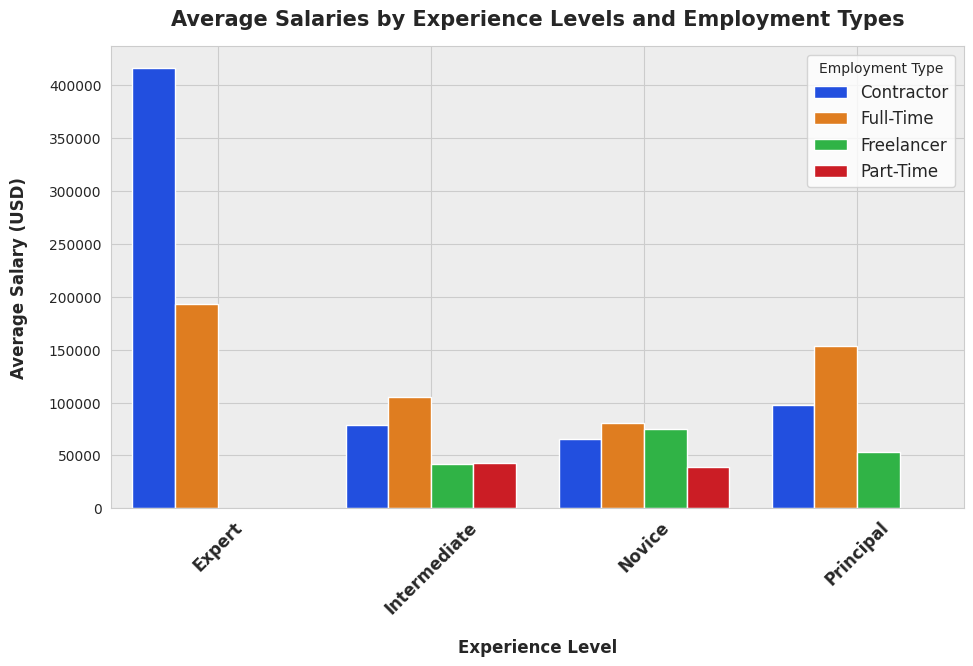

In [ ]:
# Calculating average salary for each combination of experience level and employment type.
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Finding maximum cost-effectiveness of combination with the highest average salary.
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

plt.figure(figsize=(11, 6))

sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)

plt.title('Average Salaries by Experience Levels and Employment Types', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Experience Level', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')

plt.legend(title='Employment Type', fontsize=12, loc='upper right')

ax.set_facecolor("#ededed")

ax.grid(True)

plt.show()

In [ ]:
#Insights
#The presented plot reveal that:

#Among Expert-level individuals, the Contractor employment type stands out with the highest average salary of $4,16,000.
#For Principal-level professionals, the Full-Time employment type yields the highest average salary at $1,53,225, emphasizing the significance of full-time roles at this experience level.
#For Novice professionals, the highest average salary is observed in the Full-Time employment type at 80,496.
#In the Intermediate category, Contractors lead with an average salary of $78,600, showcasing the potential financial benefit of contract-based roles.

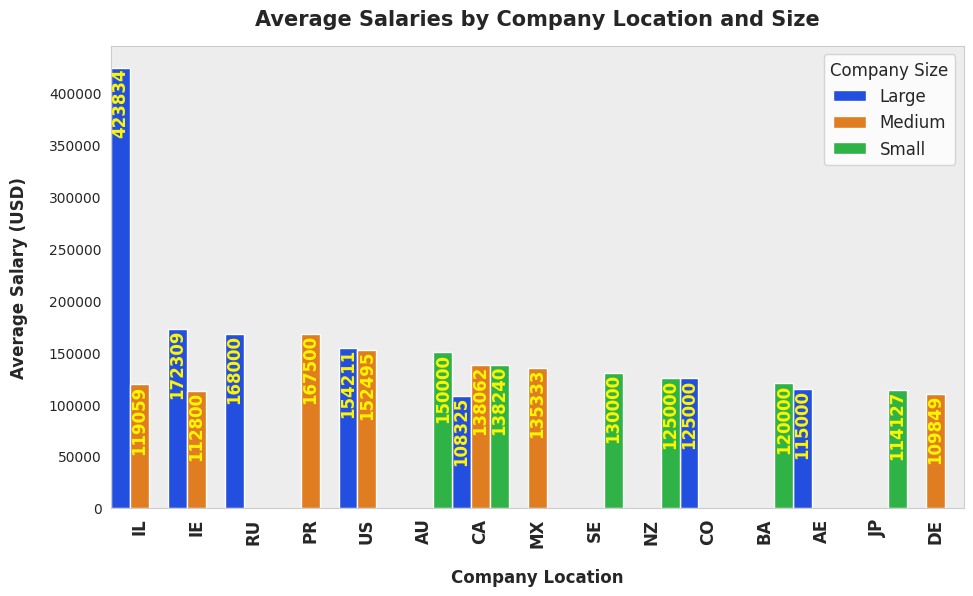

In [ ]:
# Grouping data by company location and size, and calculating mean salary in USD.
grouped_data = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean()

# Resetting index, sorting by salary in descending order, and selecting the top 20 for cost-effectiveness analysis.
cost_effectiveness = grouped_data.reset_index().sort_values(by='salary_in_usd', ascending=False)[:20]

# Finding combination of maximum cost-effectiveness with the highest average salary.
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

plt.figure(figsize=(11, 6))

sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness, width=1)

plt.title('Average Salaries by Company Location and Size', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Company Location', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=90, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                 padding=-50,
                 fontsize=12,
                 fontweight='bold', color='#fff600',
                 label_type="edge",
                 rotation=90
                 )

plt.legend(title='Company Size', title_fontsize=12, fontsize=12, loc='upper right')

ax.set_facecolor("#ededed")

ax.grid(False)

plt.show()

In [ ]:
#Insights


#Illinois leads with the highest salary at $4,23,834, outpacing Ireland at $1,72,309.
#In the United States, salaries range from $1,54,210 in large companies to $1,52,494 in medium-sized ones.
#Canada's salary landscape is diverse, covering small, medium, and large companies.
#Australia offers a competitive average salary of $1,50,000 for professionals in small-sized companies.
#Mexico stands out with an attractive $1,35,333 for professionals in medium-sized companies.
#Sweden and New Zealand attract professionals in small-sized companies with salaries of $1,30,000 and $1,25,000, respectively.
#Colombia offers a notable $1,25,000 for professionals in large companies.
#Bosnia and Herzegovina provides an average salary of $1,20,000 for professionals in small-sized companies.
#Germany takes the lead for medium-sized companies with a notable $1,09,849.

#Creating Count Plots for All Categories Taking Place in Analysis

How to do?
To create Count Plots for all categories in the analysis, we will need to:

Create a 2x2 subplot grid with a specified figure size of 11 by 6.
Define a list of columns ('experience_level', 'employment_type', 'salary_currency', 'company_size') to be plotted.
Flatten the axis array for easy iteration.
Iterate through the columns, creating count plots for each category with the Seaborn countplot function.
Set title, x-label, and y-label with corresponding context for each subplot.
Display the resulting plot.

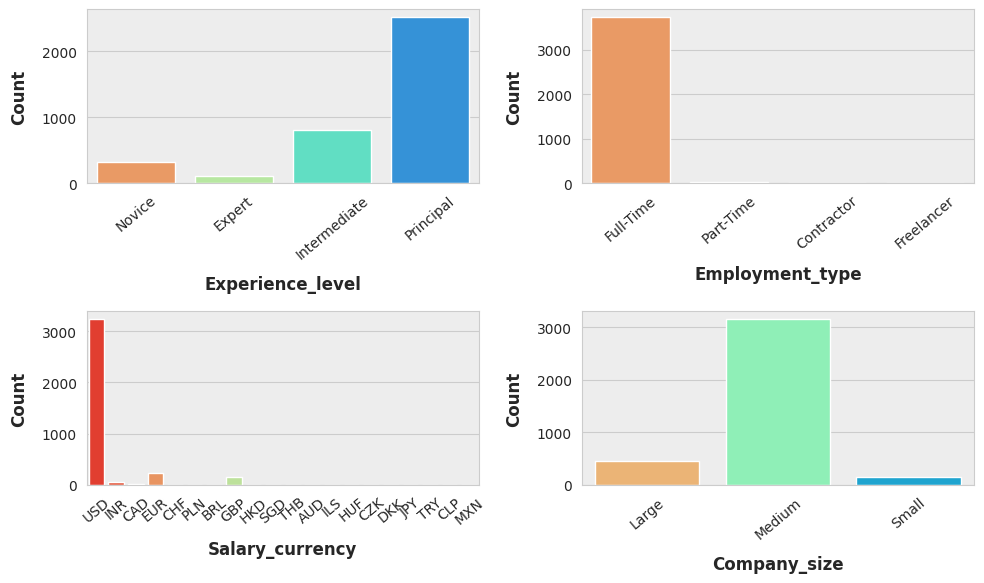

In [ ]:
# Creating a 2x2 subplot grid with a specific figure size.
fig, axis = plt.subplots(2, 2, figsize=(10, 6))

# Setting background color for the entire figure.
sns.set(rc={"axes.facecolor": "#F2EAC5", "figure.facecolor": "#F2EAC5"})

# Setting background colors for all subplots.
for ax in axis.flatten():
    ax.set_facecolor("#ededed")

# Listing columns to be plotted.
columns = ['experience_level', 'employment_type', 'salary_currency', 'company_size']

# Flattening the axis array for easy iteration.
axis = axis.flatten()

# Iterating through columns and creating count plots.
for i, col in enumerate(columns):
    p = sns.countplot(data=df, x=df[col], ax=axis[i], palette="rainbow_r")

    # Rotating x-axis labels for better readability.
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)

    # Setting labels for x and y axes
    axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold', labelpad=10)
    axis[i].set_ylabel('Count', fontsize=12, fontweight='bold', labelpad=10)

# Attempting to remove any remaining empty subplots.
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])

# Adjusting layout for a tight fit.
plt.tight_layout()

# Displaying plot.
plt.show()


In [ ]:
#Insights


#The dominant experience level is "Principal," boasting a substantial count of 2,518 professionals.
#"Full-Time" emerges as the prevailing employment type, engaging a robust workforce of 3,724 individuals.
#Notably, "Medium" companies take the lead in representation, with 3,157 individuals.
#A significant majority opts for salaries in USD, totaling 3,229 individuals.

#Conclusion
**Salary Trends Over Time:**

1-Minimal change in 2020-2021.

2Continued fluctuations in 2021-2022.

3-Similar pattern in 2022-2023.

**Company Size Impact on Salaries Over Time:**

1-Medium-sized companies witness salary growth.

2-Large companies have stable salaries.

**Impacts on Average Salaries by Experience Level:**

1-Expert professionals earn the highest salaries.

2-Principal follow, then intermediate, and novice levels.

**Experience Levels Impacts on Average Salaries:**

1-Novice-level professionals witness fluctuations.

2-Intermediate-level salaries experience a decrease.

3-Expert and Principal-level salaries show varied trends.

**Employment Types Impacts on Average Salaries:**

1-Full-Time positions have the highest average salary.
2-Contractors also earn competitive salaries.
3-Freelancers and part-timers receive relatively lower compensation.

**Top 15 Job Titles Impacts on Average Salaries:**

1-Data Science Tech Lead commands the highest average salary.

**Currency Impacts on Average Salaries:**

1-USD salaries rank the highest.
2-ILS, GBP, and CHF follow in terms of average salaries.

**Top 15 Locations Impacts on Average Salaries:**

1-Illinois offers the highest average salaries.

**Company Size Impacts on Average Salaries:**

1-Medium-sized companies tend to offer the highest average salaries.

**Company Size and Location Impacts on Average Salaries:**

1-Diverse salary landscapes across different company sizes and locations.

**Salaries Distribution:**

1-The distribution is right-skewed with a noticeable peak.

**Experience Levels Distribution For Each Job Title:**

1-Principal-level professionals dominate, followed by Experts.
Other levels exhibit a smaller distribution.

**Top 4 Job Titles Recommendation for Novice Level:**

Data Analyst

Data Scientist

Data Engineer

Machine Learning Engineer


**Other Insights:**

1-"Principal" is the most common experience level.

2-"Full-Time" is the predominant employment type.

3-The majority of individuals earn salaries in USD.

4-"Medium" companies are prevalent in the dataset.